In [1]:
import networkx as nx
import random
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
class LabelPropagation:
    def __init__(self, graph):
        """
        Khởi tạo thuật toán Label Propagation
        Args:
            graph: Đồ thị NetworkX
        """
        self.graph = graph
        self.labels = {}  # Lưu trữ nhãn của các node
        self.max_iter = 100  # Số lần lặp tối đa

    def initialize_labels(self):
        """Khởi tạo nhãn cho mỗi node: mỗi node là một cộng đồng riêng"""
        for node in self.graph.nodes():
            self.labels[node] = node

    def update_label(self, node):
        """
        Cập nhật nhãn cho một node dựa trên nhãn phổ biến nhất của láng giềng
        Args:
            node: Node cần cập nhật nhãn
        """
        # Lấy nhãn của các láng giềng
        neighbor_labels = [self.labels[neighbor]
                         for neighbor in self.graph.neighbors(node)]

        if not neighbor_labels:
            return

        # Đếm tần suất xuất hiện của mỗi nhãn
        label_counts = Counter(neighbor_labels)

        # Tìm nhãn phổ biến nhất
        max_count = max(label_counts.values())
        most_common_labels = [label for label, count in label_counts.items()
                            if count == max_count]

        # Chọn ngẫu nhiên nếu có nhiều nhãn cùng tần suất cao nhất
        self.labels[node] = random.choice(most_common_labels)

    def propagate(self):
        """Thực hiện quá trình lan truyền nhãn"""
        iteration = 0
        changed = True

        while changed and iteration < self.max_iter:
            changed = False
            # Tạo thứ tự ngẫu nhiên các node
            nodes = list(self.graph.nodes())
            random.shuffle(nodes)

            old_labels = self.labels.copy()

            # Cập nhật nhãn cho từng node
            for node in nodes:
                old_label = self.labels[node]
                self.update_label(node)
                if old_label != self.labels[node]:
                    changed = True

            iteration += 1

        return iteration

    def get_communities(self):
        """Trả về các cộng đồng được tìm thấy"""
        communities = {}
        for node, label in self.labels.items():
            if label not in communities:
                communities[label] = {node}
            else:
                communities[label].add(node)
        return list(communities.values())

    def visualize(self, title="Label Propagation Results"):
        """Vẽ đồ thị với các cộng đồng được tô màu khác nhau"""
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(self.graph)

        # Vẽ đồ thị với màu sắc cho từng cộng đồng
        colors = [self.labels[node] for node in self.graph.nodes()]
        nx.draw(self.graph, pos, node_color=colors, with_labels=True,
               node_size=500, cmap=plt.cm.rainbow)

        plt.title(title)
        plt.show()

Nhãn ban đầu: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

Hoàn thành sau 3 lần lặp

Các cộng đồng được tìm thấy:
Cộng đồng 1: {1, 2, 3}
Cộng đồng 2: {4, 5, 6}


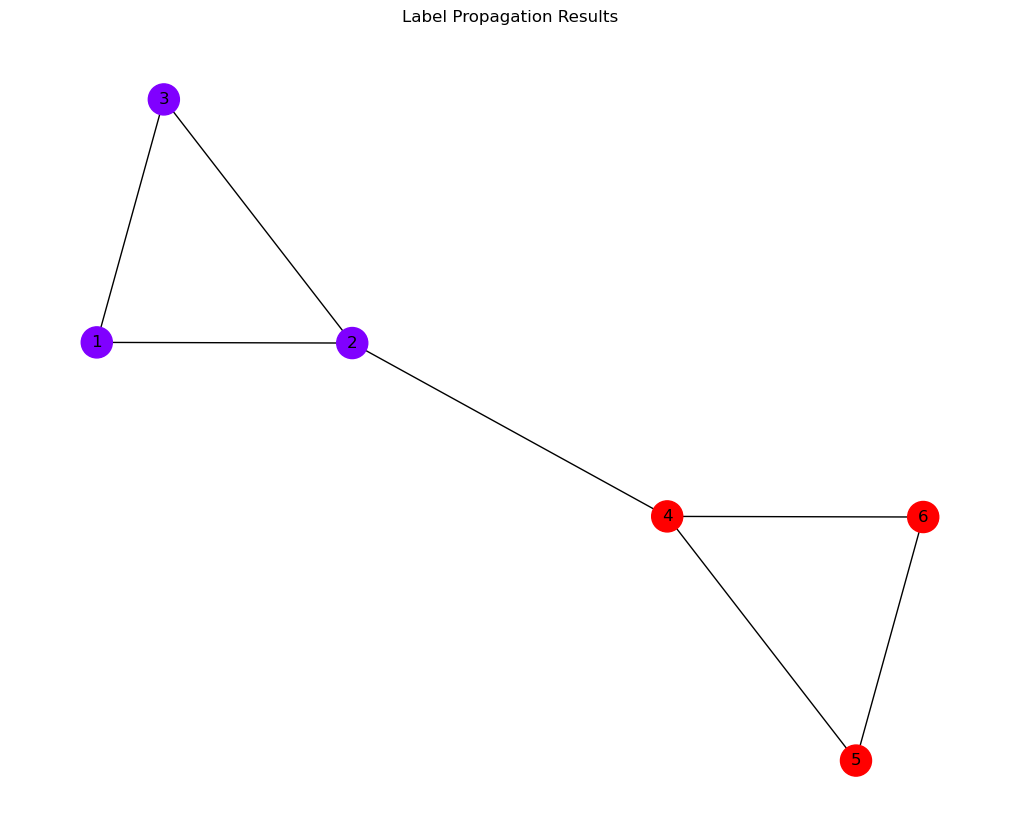

In [3]:
def create_sample_graph():
    """Tạo đồ thị mẫu với 2 cộng đồng rõ ràng"""
    G = nx.Graph()

    # Cộng đồng 1
    G.add_edges_from([
        (1, 2), (1, 3), (2, 3)
    ])

    # Cộng đồng 2
    G.add_edges_from([
        (4, 5), (4, 6), (5, 6)
    ])

    # Cạnh nối giữa hai cộng đồng
    G.add_edge(2, 4)

    return G

# Ví dụ sử dụng
def main():
    # Tạo đồ thị mẫu
    G = create_sample_graph()

    # Khởi tạo thuật toán
    lpa = LabelPropagation(G)

    # Khởi tạo nhãn
    lpa.initialize_labels()
    print("Nhãn ban đầu:", lpa.labels)

    # Thực hiện lan truyền nhãn
    iterations = lpa.propagate()
    print(f"\nHoàn thành sau {iterations} lần lặp")

    # In kết quả các cộng đồng
    communities = lpa.get_communities()
    print("\nCác cộng đồng được tìm thấy:")
    for i, community in enumerate(communities, 1):
        print(f"Cộng đồng {i}: {community}")

    # Vẽ kết quả
    lpa.visualize()

if __name__ == "__main__":
    main()